# Content
## Representing Data and Engineering Features
- Definitions and explaination
- Categorical Features
    - Categorical variables
- Feature Engineering
    - One-Hot-Encoding (Dummy variables)
    - numbers can encode Categorical
    - Binning, (Discretization), Linear Models, and Trees
        - Binning : more Beneficial for linear model
    - Interactions and polynomials
        - Using Binning
        - Using polynomials of the original Features
    - Univariate Nonlinear Transformations
    - Automatic Feature Selection
        - Univariate statistics
        - model-based Feature Selection
        - iterative Selection 
- Utilizing Expert Knowledge

### Definitions
#### categorical features
Also known as discrete features, these are usually not numeric.Examples of categorical features are the brand of a product, the color of a product, or the department (books, clothing, hardware) it is sold in. These are all properties that can describe a product, but they don’t vary in a continuous way. A product belongs either in the clothing department or in the books department. There is no middle
ground between books and clothing, and no natural order for the different categories.

### feature engineering
how to represent your data best for a particular application, it is one of the main tasks of data scientists and machine learning practitioners trying to solve real-world problems. Representing your data in
the right way can have a bigger influence on the performance of a supervised model than the exact parameters you choose.

### categorical variables
Using the dataset of adult incomes in the United States, derived from the 1994 census database.In this dataset, age and hours-per-week are continuous features, which we know how to treat. The workclass, education, sex, and occupation features are categorical, however. All of them come from a fixed list of possible values, as opposed to a
range, and denote a qualitative property, as opposed to a quantity.

### To overcome this problem 

### One-Hot-Encoding (Dummy variables)

By far the most common way to represent categorical variables is using the one-hotencoding or one-out-of-N encoding, also known as dummy variables. The idea behind
dummy variables is to replace a categorical variable with one or more new features that can have the values 0 and 1. The values 0 and 1 make sense in the formula for
linear binary classification (and for all other models in scikit-learn), and we can represent any number of categories by introducing one new feature per category,

There are two ways to convert your data to a one-hot encoding of categorical variables, using either pandas or scikit-learn. 

In [1]:
# Importing Used Libraries
import sklearn
from preamble import *
%matplotlib inline

In [2]:
import pandas as pd
# The file has no headers naming the columns, so we pass header=None
# and provide the column names explicitly in "names"
data = pd.read_csv("adult.data", header=None, index_col=False,
names=['age', 'workclass', 'fnlwgt', 'education', 'education-num',
'marital-status', 'occupation', 'relationship', 'race', 'gender',
'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
'income'])
# For illustration purposes, we only select some of the columns
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']]
# IPython.display allows nice output formatting within the Jupyter notebook
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


### Note
In a real application, you should look at all columns and check their
values. 

In [3]:
print(data.gender.value_counts())

Male      21790
 Female    10771
Name: gender, dtype: int64


There is a very simple way to encode the data in pandas, using the get_dummies function. The get_dummies function automatically transforms all columns that have object type (like strings) or are categorical 

In [4]:
print("Original features:\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("Features after get_dummies:\n", list(data_dummies.columns))

Original features:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

Features after get_dummies:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-i

In [5]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,...,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,...,0,0,1,0
1,50,13,0,0,...,0,0,1,0
2,38,40,0,0,...,0,0,1,0
3,53,40,0,0,...,0,0,1,0
4,28,40,0,0,...,0,0,1,0


We can now use the values attribute to convert the data_dummies DataFrame into a [NumPy array], and then train a machine learning model on it. 

Be careful to separate the target variable (which is now encoded in two income columns) from the data before training a model.

In [6]:
# Extract columns including features
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
# Extract NumPy arrays
X = features.values
y = data_dummies['income_ >50K'].values
print("X.shape: {} y.shape: {}".format(X.shape, y.shape))

X.shape: (32561, 44) y.shape: (32561,)


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("Test score: {:.2f}".format(logreg.score(X_test, y_test)))

Test score: 0.81


### Note
In this example, we called get_dummies on a DataFrame containing
both the training and the test data. This is important to ensure cat‐
egorical values are represented in the same way in the training set
and the test set

### Numbers Can Encode Categoricals
Categorical features are often encoded using integers. That they are numbers doesn’t mean that they should necessarily be treated as continuous features. It is not always clear whether an integer feature should be treated as continuous or discrete (and one-hotencoded). If there is no ordering between the semantics that are
encoded , the feature must be treated as discrete. For other cases, like five-star ratings, the better encoding depends on the particular task and data and which machine learning algorithm is used

The get_dummies function in pandas treats all numbers as continuous and will not create dummy variables for them. To get around this, you can either use scikitlearn’s OneHotEncoder, for which you can specify which variables are continuous and which are discrete, or convert numeric columns in the DataFrame to strings

In [8]:
demo_df = pd.DataFrame({'Integer Feature': [0, 1, 2, 1],
'Categorical Feature': ['socks', 'fox', 'socks', 'box']})
display(demo_df)

,Integer Feature,Categorical Feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


In [9]:
pd.get_dummies(demo_df)

,Integer Feature,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


In [10]:
demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)
pd.get_dummies(demo_df, columns=['Integer Feature', 'Categorical Feature'])

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


### Binning, Discretization, Linear Models, and Trees
The best way to represent data depends not only on the semantics of the data, but also on the kind of model you are using. Linear models and tree-based models (such as decision trees, gradient boosted trees, and random forests), two large and very commonly used families, have very different properties when it comes to how they work with different feature representations. 

One way to make linear models more powerful on continuous data is to use [binning (also known as discretization)] of the feature to split it up into multiple features, as
described here.

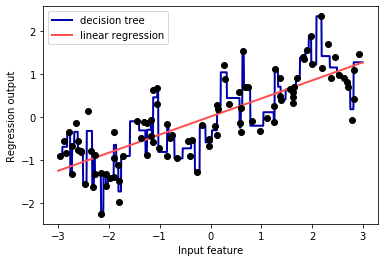

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label="decision tree")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="linear regression")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

### Apply binning
We imagine a partition of the input range for the feature (in this case, the numbers from –3 to 3) into a fixed number of bins—say, 10. A data point will then be represented by which bin it falls into.

In [12]:
# We use the np.linspace function for this, creating 11 entries, which will create 10 bins
bins = np.linspace(-3, 3, 11)
print("bins: {}".format(bins))

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [13]:
which_bin = np.digitize(X, bins=bins)
print("\nData points:\n", X[:5])
print("\nBin membership for data points:\n", which_bin[:5])


Data points:
 [[-0.753]
 [ 2.704]
 [ 1.392]
 [ 0.592]
 [-2.064]]

Bin membership for data points:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


transform the single continuous input feature in the wave dataset
into a categorical feature that encodes which bin a data point is in. 

In [14]:
from sklearn.preprocessing import OneHotEncoder
# transform using the OneHotEncoder
encoder = OneHotEncoder(sparse=False)
# encoder.fit finds the unique values that appear in which_bin
encoder.fit(which_bin)
# transform creates the one-hot encoding
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [15]:
print("X_binned.shape: {}".format(X_binned.shape))

X_binned.shape: (100, 10)


Text(0.5, 0, 'Input feature')

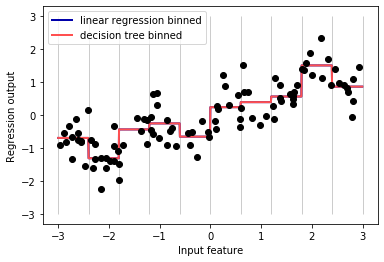

In [16]:
line_binned = encoder.transform(np.digitize(line, bins=bins))
reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='linear regression binned')
reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='decision tree binned')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")

The dashed line and solid line are exactly on top of each other, meaning the linear regression model and the decision tree make exactly the same predictions. For each bin, they predict a constant value. As features are constant within each bin, any model must predict the same value for all points within a bin. Comparing what the models learned before binning the features and after, we see that 
- the linear model became much more flexible, because it now has a different value for each bin.
- the decision tree model got much less flexible, Binning features generally has no beneficial effect for tree-based models, as these models can learn to split up the data anywhere. 

### Interaction and Polynomial
Another way to enrich a feature representation, particularly for linear models, is adding interaction features and polynomial features of the original data. This kind of feature engineering is often used in statistical modeling, but it’s also common in many practical machine learning applications.
#### Using Binning

In [17]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

(100, 11)


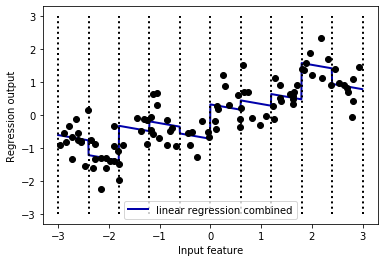

In [18]:
#Linear regression using binned features and a single global slope
reg = LinearRegression().fit(X_combined, y)
line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='linear regression combined')
for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.plot(X[:, 0], y, 'o', c='k')

In this example, the model learned an offset for each bin, together with a slope. The learned slope is [downward], and shared across all the bins—there is a single x-axis feature, [which has a single slope]. Because the slope is shared across all bins, it doesn’t seem to be very helpful. We would rather have a [separate slope for each bin], We can achieve this by adding an interaction or product feature that indicates which bin a data point is in and where it lies on the x-axis. 

In [19]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

(100, 20)


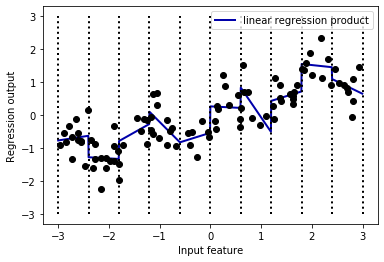

In [20]:
reg = LinearRegression().fit(X_product, y)
line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='linear regression product')
for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

# Using Polynomials of the original feature

In [21]:
from sklearn.preprocessing import PolynomialFeatures
# include polynomials up to x ** 10:
# the default "include_bias=True" adds a feature that's constantly 1
# Using a degree of 10 yields 10 features
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [22]:
print("X_poly.shape: {}".format(X_poly.shape))

X_poly.shape: (100, 10)


In [23]:
print("Entries of X:\n{}".format(X[:5]))
print("Entries of X_poly:\n{}".format(X_poly[:5]))

Entries of X:
[[-0.753]
 [ 2.704]
 [ 1.392]
 [ 0.592]
 [-2.064]]
Entries of X_poly:
[[   -0.753     0.567    -0.427     0.321    -0.242     0.182    -0.137
      0.103    -0.078     0.058]
 [    2.704     7.313    19.777    53.482   144.632   391.125  1057.714
   2860.36   7735.232 20918.278]
 [    1.392     1.938     2.697     3.754     5.226     7.274    10.125
     14.094    19.618    27.307]
 [    0.592     0.35      0.207     0.123     0.073     0.043     0.025
      0.015     0.009     0.005]
 [   -2.064     4.26     -8.791    18.144   -37.448    77.289  -159.516
    329.222  -679.478  1402.367]]


In [24]:
print("Polynomial feature names:\n{}".format(poly.get_feature_names()))

Polynomial feature names:
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


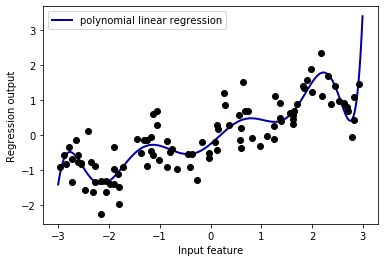

In [25]:
reg = LinearRegression().fit(X_poly, y)
line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='polynomial linear regression')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

As you can see, polynomial features yield a very smooth fit on this one-dimensional data. However, polynomials of high degree tend to behave in extreme ways on the [boundaries] or in [regions with little data].

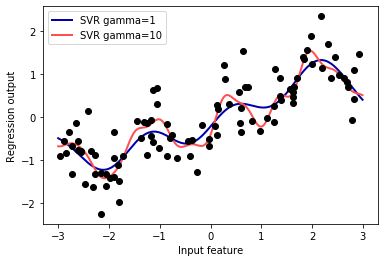

In [26]:
from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

In [27]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

# rescale data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_poly.shape: {}".format(X_train_poly.shape))

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


These new features represent all possible interactions between two different original features, as well as the square of each original feature. degree=2 here means that we look at all features that are the product of up to two original features.

In [29]:
print("Polynomial feature names:\n{}".format(poly.get_feature_names()))

Polynomial feature names:
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [30]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print("Score without interactions: {:.3f}".format(
ridge.score(X_test_scaled, y_test)))
ridge = Ridge().fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(
ridge.score(X_test_poly, y_test)))

Score without interactions: 0.621
Score with interactions: 0.753


Clearly, the interactions and polynomial features gave us a good boost in performance when using Ridge.

### When using a more complex model like a random forest

In [31]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled, y_train)
print("Score without interactions: {:.3f}".format(
rf.score(X_test_scaled, y_test)))
rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(rf.score(X_test_poly, y_test)))

Score without interactions: 0.805
Score with interactions: 0.791


Adding interactions and polynomials actually decreases performance slightly

### Univariate Nonlinear Transformations
There are other transformations that often prove useful for transforming certain features: in particular, applying mathematical functions like log, exp, or sin. 

While tree-based models only care about the ordering of the features, linear models and neural networks are very tied to the scale and distribution of each feature, and if there is a nonlinear relation between the feature and the target, that becomes hard to model
—[particularly in regression].

- The functions log and exp can help by adjusting the relative scales in the data so that they can be captured better by a linear model or neural network.  
- The sin and cos functions can come in handy when dealing with data that encodes periodic patterns.

### Most models work best when each feature (and in regression also the target) is loosely Gaussian distributed

In [32]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

In [33]:
print("Number of feature appearances:\n{}".format(np.bincount(X[:, 0])))

Number of feature appearances:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0.5, 0, 'Value')

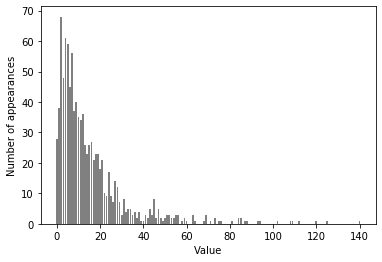

In [34]:
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

In [35]:
print("Number of feature appearances:\n{}".format(np.bincount(X[:, 1])))

Number of feature appearances:
[17 67 49 66 59 64 46 52 46 36 31 33 35 24 27 33 25 21 17 16 11 11 12 11
 11  8  5  8 10 13  6  8  4  1  6  7  3  6  7  3  5  2  4  5  3  2  5  4
  2  0  1  1  0  4  0  4  2  2  1  0  3  1  1  2  1  0  1  3  3  0  1  0
  0  0  0  1  2  2  0  0  1  0  2  0  0  1  0  0  0  0  0  1  0  0  0  0
  2  1  0  0  0  0  0  0  0  0  1  0  0  0  0  1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  1  0  0  0  0  1  1  0  0  0  0  0  1  0  0  0  0
  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  1]


Text(0.5, 0, 'Value')

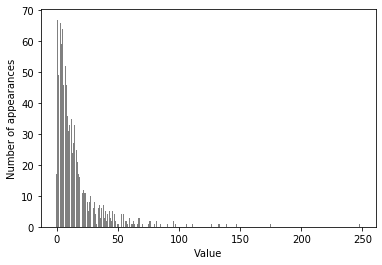

In [36]:
bins = np.bincount(X[:, 1])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

In [37]:
print("Number of feature appearances:\n{}".format(np.bincount(X[:, 2])))

Number of feature appearances:
[15 47 56 71 62 71 61 38 48 42 43 25 26 31 29 24 29 22 16 16 10  4 12 10
 16 13 13  7  5  8  5  8  7  5  2  8  3  3  4  3  8  6  3  3  2  2  1  2
  3  2  0  0  1  3  4  4  1  0  1  2  1  2  2  3  1  1  1  1  0  0  1  3
  0  0  0  1  2  1  2  0  0  1  0  0  0  0  0  0  0  0  1  0  0  1  0  1
  1  0  1  0  0  1  0  0  1  0  0  1  0  0  0  0  0  0  1  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0.5, 0, 'Value')

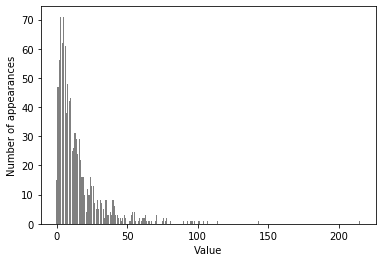

In [38]:
bins = np.bincount(X[:, 2])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

Features X[:, 1\] and X[:, 2\] have similar properties. This kind of distribution of values (many small ones and a few very large ones) is very common in practice However, it is something most linear models can’t handle very well.

In [39]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.622


Applying a logarithmic transformation can help, though. Because the value 0 appears in the data (and the logarithm is not defined at 0), we can’t actually just apply log, but we have to compute log(X + 1)

Text(0.5, 0, 'Value')

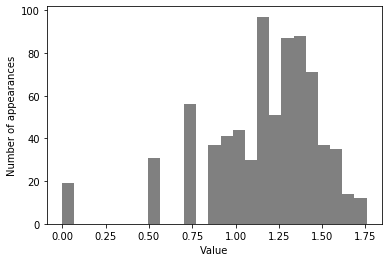

In [40]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)
plt.hist(np.log(X_train_log[:, 0] + 1), bins=25, color='gray')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

In [41]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.875


As you saw in the previous examples, binning, polynomials, and interactions can have a huge influence on how models perform on a given dataset. This is particularly true for less complex models like 
- linear models
- naive Bayes models.

Tree-based models, on the other hand, are often able to discover important interactions themselves, and don’t require transforming the data explicitly most of the time. Other
models, like:
- SVMs.
- nearest neighbors
- and neural networks
might sometimes benefit from using binning, interactions, or polynomials, but the implications there are usually much less clear than in the case of linear models.

### Automatic Feature Selection

With so many ways to create new features, you might get tempted to increase the dimensionality of the data way beyond the number of original features. However, adding more features makes all models more complex, and so increases the chance of overfitting. When adding new features, or with high-dimensional datasets in general, it can be a good idea to reduce the number of features to only the most useful ones, and discard the rest. This can lead to simpler models that generalize better.

### How can you know how good Feature is ?

There are three basic strategies:
- Univariate Statistics
- model based Selection
- iterative Selection

All of these methods are supervised methods, meaning they need the
target for fitting the model. This means we need to split the data into training and test sets, and fit the feature selection only on the training part of the data.

### Univariate Statistics
In univariate statistics, we compute whether there is a statistically significant relationship between each feature and the target. Then the features that are related with the highest confidence are selected

In the case of classification, this is also known as
analysis of variance (ANOVA). A key property of these tests is that they are [univariate], meaning that they only consider each feature individually,Consequently, a feature will be discarded if it is only informative when combined with another feature.

 [they are completely independent of the model]

All methods for discarding parameters use a threshold to discard all features with too high a p-value (which means they are unlikely to be related to the target). The methods differ in how they compute this threshold, with the simplest ones 
- SelectKBest, which selects a fixed number k of features
- SelectPercentile, which selects a fixed percentage of features. 

In [42]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# get deterministic random numbers
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# add noise features to the data
# the first 30 features are from the dataset, the next 50 are noise
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(
X_w_noise, cancer.target, random_state=0, test_size=.5)
# use f_classif (the default) and SelectPercentile to select 50% of features
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
# transform training set
X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


The number of features was reduced from 80 to 40 (50 percent of the original number of features).

[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


Text(0.5, 0, 'Sample index')

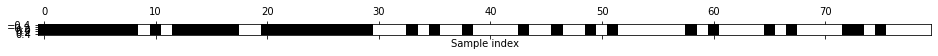

In [43]:
mask = select.get_support()
print(mask)
# visualize the mask -- black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

most of the selected features are the original features, and most of the noise features were removed.

In [44]:
from sklearn.linear_model import LogisticRegression
# transform test data
X_test_selected = select.transform(X_test)
lr = LogisticRegression()
lr.fit(X_train, y_train)
print("Score with all features: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("Score with only selected features: {:.3f}".format(
lr.score(X_test_selected, y_test)))

Score with all features: 0.916
Score with only selected features: 0.919


Univariate feature selection can still be very helpful, though, if there is such a large number of features that building a model on them is infeasible, or if you suspect that many features are completely uninformative.

### Model Based Feature selection
Model-based feature selection uses a supervised machine learning model to judge the importance of each feature, and keeps only the most important ones. The supervised model that is used for feature selection doesn’t need to be the same model that is used for the final supervised modeling

- Decision trees and decision tree–based models provide a feature_importances_attribute which directly encodes the importance of each feature
- Linear models have coefficients, which can also be used to capture feature importances by considering the absolute values.

model-based selection considers all features at once, and so can capture interactions (if the model
can capture them). 

In [45]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(
RandomForestClassifier(n_estimators=100, random_state=42),
threshold="median")

The SelectFromModel class selects all features that have an importance measure of the feature (as provided by the supervised model) greater than the provided threshold. 

In [46]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


Text(0.5, 0, 'Sample index')

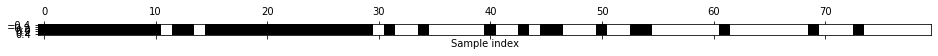

In [47]:
mask = select.get_support()
# visualize the mask -- black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

In [48]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.930


### Iterative Feature Selection
In iterative feature selection, a series of models are built,
with varying numbers of features. 

There are two basic methods:
- tarting with no features and adding features one by one until some stopping criterion is reached
- starting with all features and removing features one by one until some stopping criterion is reached.

#### Recursive feature elimination (REF)
starts with all features, builds a model, and discards the least important feature according to the model. Then a new model is built using all but the discarded feature, and so on until only a prespecified number of features are left. For this to work, the model used for
selection needs to provide some way to determine feature importance, as was the case for the model-based selection.

Text(0.5, 0, 'Sample index')

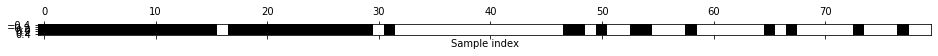

In [49]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
n_features_to_select=40)

select.fit(X_train, y_train)
# visualize the selected features:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

In [50]:
X_train_rfe= select.transform(X_train)
X_test_rfe= select.transform(X_test)
score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.930


In [51]:
print("Test score: {:.3f}".format(select.score(X_test, y_test)))

Test score: 0.951


### Utilizing Expert Knowledge

In [56]:
citibike = mglearn.datasets.load_citibike()

In [57]:
print("Citi Bike data:\n{}".format(citibike.head()))

Citi Bike data:
starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


Text(0, 0.5, 'Rentals')

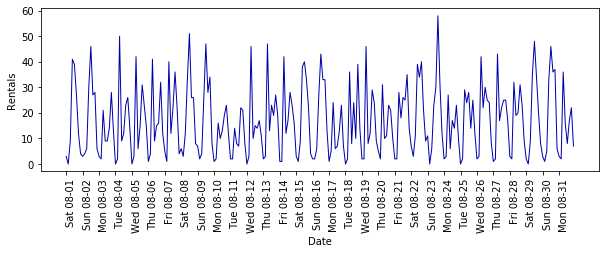

In [58]:
plt.figure(figsize=(10, 3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(),
freq='D')
plt.xticks(xticks, xticks.strftime("%a %m-%d"), rotation=90, ha="left")
plt.plot(citibike, linewidth=1)
plt.xlabel("Date")
plt.ylabel("Rentals")

We will use the first 184 data points, corresponding to the first 23
days, as our training set, and the remaining 64 data points, corresponding to the remaining 8 days, as our test set.

In [60]:
# extract the target values (number of rentals)
y = citibike.values
# convert the time to POSIX time using "%s"
X = citibike.index.astype("int64").values.reshape(-1, 1) // 10**9

In [61]:
# use the first 184 data points for training, and the rest for testing
n_train = 184

# function to evaluate and plot a regressor on a given feature set
def eval_on_features(features, target, regressor):
    # split the given features into a training and a test set
    X_train, X_test = features[:n_train], features[n_train:]
    # also split the target array
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print("Test-set R^2: {:.2f}".format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10, 3))
    plt.xticks(range(0, len(X), 8), xticks.strftime("%a %m-%d"), rotation=90,
    ha="left")
    plt.plot(range(n_train), y_train, label="train")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="test")
    plt.plot(range(n_train), y_pred_train, '--', label="prediction train")
    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--',
    label="prediction test")
    plt.legend(loc=(1.01, 0))
    plt.xlabel("Date")
    plt.ylabel("Rentals")

Test-set R^2: -0.04


<Figure size 432x288 with 0 Axes>

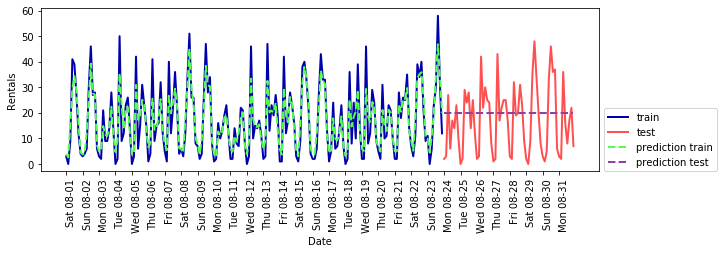

In [62]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
plt.figure()
eval_on_features(X, y, regressor)